In [5]:
import pickle
import pandas as pd

In [11]:
hf_pytorch = pickle.load(open("/mnt/home/TF_NEW/bert_sequence_length_benchmark/tf_pt_bert_benchmark.pkl", "rb"))
hf_tensorflow = pickle.load(open("/mnt/home/TF_NEW/bert_sequence_length_benchmark/tf_hf_bert_benchmark.pkl", "rb"))
tf_transformers_tensorflow = pickle.load(open("/mnt/home/TF_NEW/bert_sequence_length_benchmark/tft_bert_benchmark.pkl", "rb"))

# Sequence Length

In [12]:
# Columns
keys = hf_pytorch['hf_pt_forward'].keys()

# results
results = []
results.append(list(hf_pytorch['hf_pt_forward'].values()))
results.append(list(hf_tensorflow['hf_tf_forward'].values()))
results.append(list(tf_transformers_tensorflow['tft_forward'].values()))

df_sequence_length = pd.DataFrame(results)

# columns and index
df_sequence_length.columns = keys
df_sequence_length.index   = ['hf_pytorch', 'hf_tensorflow', 'tf_transformers_tensorflow']

In [13]:
# Highlight
df_sequence_length.style.highlight_min(color = 'lightgreen', axis = 0)


In [10]:
df_sequence_length.sample(n = 10, axis='columns').style.highlight_min(color = 'lightgreen', axis = 0)


# Find the count of index based on speed


In [14]:
df_sequence_length.idxmin(axis=0).value_counts()

hf_pytorch                    28
tf_transformers_tensorflow     2
dtype: int64

In [24]:
df_smaller_batch_size = df_sequence_length[df_sequence_length.columns[:15]]

# Greedy Visualize

Text(0, 0.5, 'Time in Seconds')

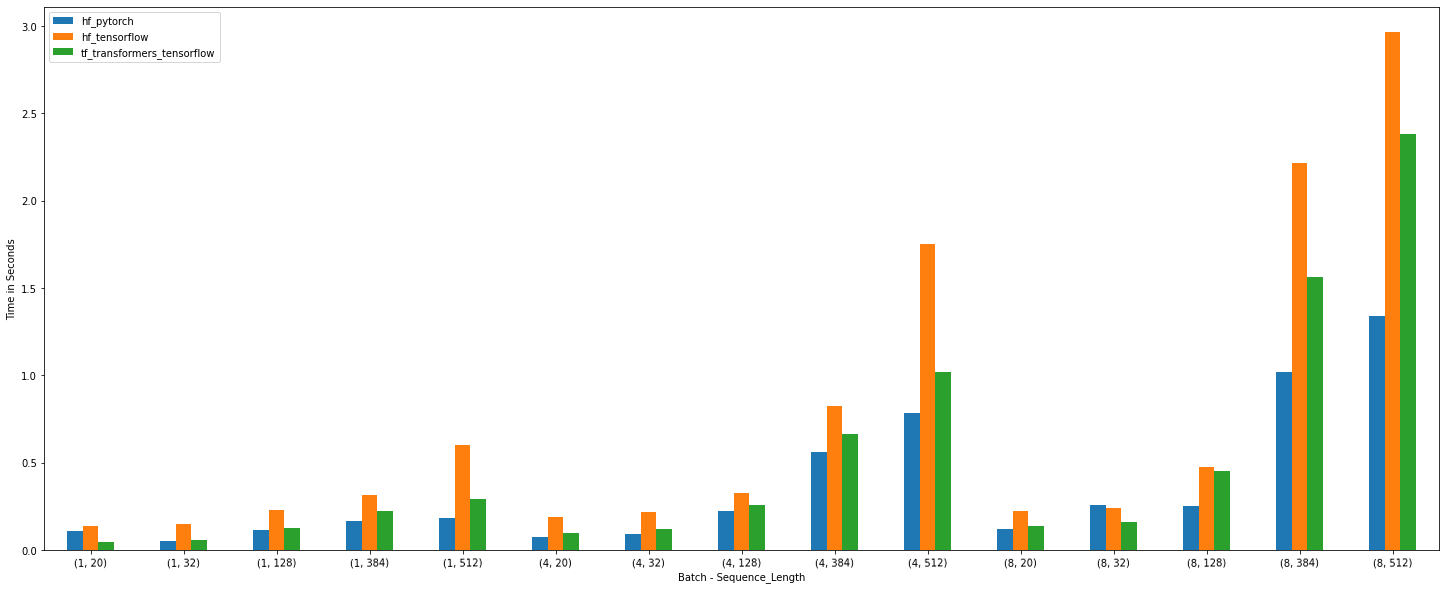

In [25]:
ax = df_smaller_batch_size.transpose().plot.bar(rot=1, figsize=(25,10))
ax.set_xlabel("Batch - Sequence_Length")
ax.set_ylabel("Time in Seconds")

Text(0, 0.5, 'Time in Seconds')

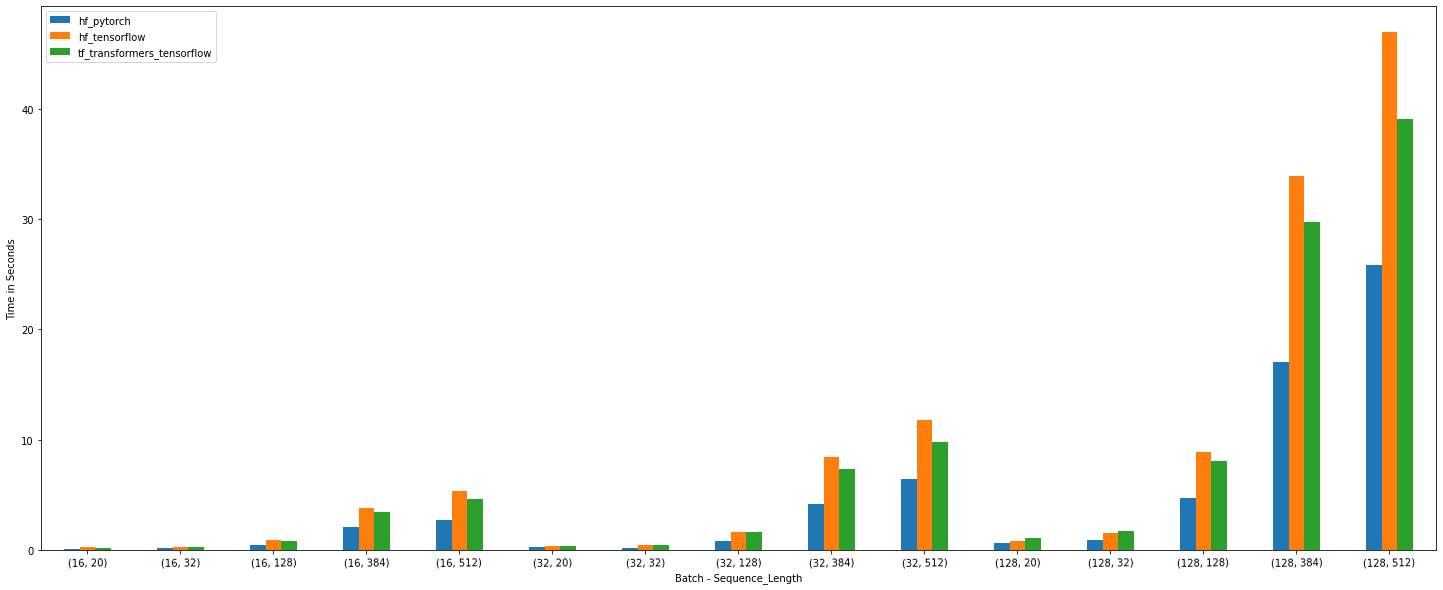

In [27]:
df_larger_batch_size = df_sequence_length[df_sequence_length.columns[15:]]
ax = df_larger_batch_size.transpose().plot.bar(rot=1, figsize=(25,10))
ax.set_xlabel("Batch - Sequence_Length")
ax.set_ylabel("Time in Seconds")